In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [3]:
dataset = pd.read_csv('data/heatflow_resid_train.csv')

#box and whisker plot of all features
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()



First, do a basic description of all of the features:

In [4]:
#scatterplot of predicted values. Plot the arrays outputs vs labels

plt.scatter(dataset['outputs'], dataset['labels'], c=['red','blue'])


,hf22_tgwt,cond_sur,cond_lcr,cond_mcr,cond_uma,cond_man,geop_mag,geop_grv,geop_dtb,eqi200n5,...,fault01,fault02,fault03,fault04,fault05,fault06,fault07,fault08,faultAl,hfqc_resid
count,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,...,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
mean,84.215340,2.904011,4.096880,3.059997,3.867164,4.200543,-31.447629,-6.276163,442.590813,1271.432940,...,113681.222247,13102.336005,7552.950445,6221.868873,3625.135510,3448.149763,3184.960895,3184.960895,3017.196804,219.768838
std,7.312246,0.561523,0.364093,0.532789,0.190964,0.065052,139.578571,11.761215,985.091432,2417.688062,...,117623.413892,15432.277910,11982.479546,9590.459583,5272.385661,4937.309973,3650.146813,3650.146813,3380.055335,717.542337
min,60.543701,0.870828,2.758250,0.776779,3.450930,3.886300,-800.406006,-64.729401,-9999.000000,-9999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-91.188824
25%,78.581848,2.617540,3.809910,2.764320,3.748020,4.150280,-108.173498,-14.096750,61.382524,332.500000,...,25629.775390,2567.809936,1414.209961,1250.000000,750.000000,707.106995,707.106995,707.106995,707.106995,-2.909101
50%,84.735298,2.884190,4.018740,3.008610,3.859020,4.212105,-52.001501,-5.904085,279.886505,618.600006,...,61971.500000,9070.884765,4246.320069,3553.169922,2015.560059,1952.560059,1952.560059,1952.560059,1903.939941,40.498212
75%,88.441725,3.210743,4.287540,3.335370,3.984090,4.247610,29.486575,1.835548,642.796753,1373.000030,...,182027.000000,19237.025390,9581.879883,8053.530029,4716.990234,4527.689941,4472.140137,4472.140137,4250.000000,153.806195
max,102.328003,5.115060,5.325150,4.963910,4.626700,4.432190,800.979981,61.842201,6651.750000,31059.300780,...,443466.000000,135712.000000,121955.000000,121955.000000,65004.800780,65004.800780,30391.199220,30391.199220,30391.199220,11105.418870


fault07 same as fault08



Now, we can perform a few plots. First, we will apply the missingno heatmap. This demonstrates how strongly the presence or absence of one variable affects the others.

/home/andy/anaconda3/envs/d2l/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/andy/anaconda3/envs/d2l/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

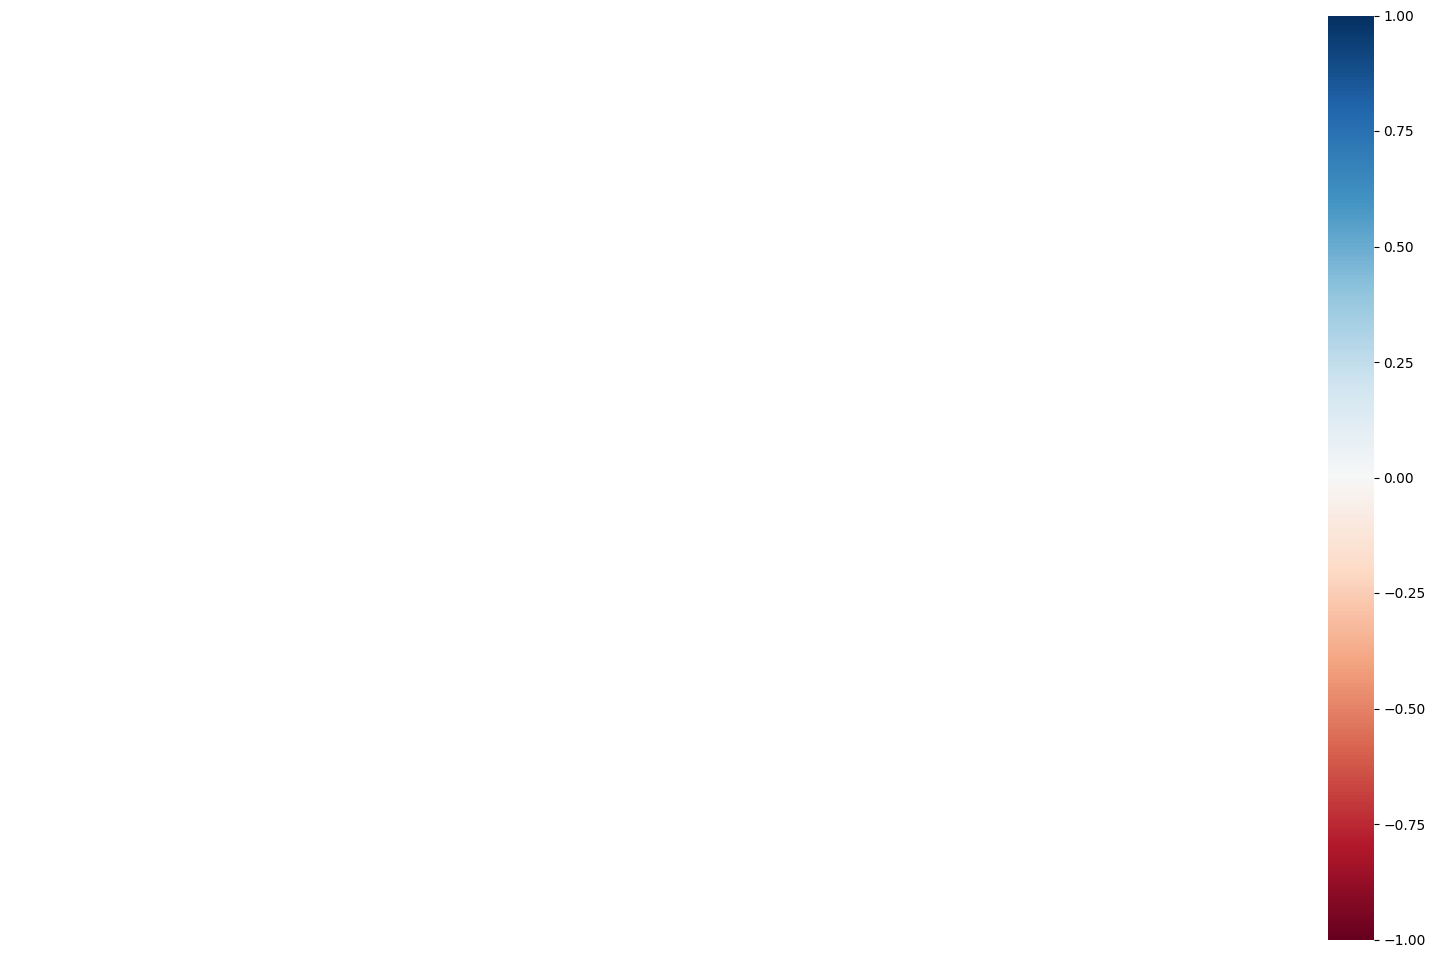

In [5]:
msno.heatmap(dataset)

notes on heatmap if any

Next, we apply a seaborn heatmap to the data. In this heatmap, we can compare features to see those which have a high correlation to each other. If they do, then we can assume they are providing similar information and we can remove one of them.

In [10]:
correlation = dataset.corr()
print(correlation['hfqc_resid'].sort_values(ascending = False),'\n')

hfqc_resid    1.000000
cond_lcr      0.095254
cond_man      0.070076
eqi200n5      0.048451
cond_mcr      0.033390
geop_dtb      0.033248
cond_uma      0.029778
geod_2nd      0.013569
hf22_tgwt     0.011652
geod_shr      0.010033
geod_dil      0.005188
eqd200n5      0.000607
hfqc_tRise   -0.007525
cond_sur     -0.007753
geop_mag     -0.016050
fault03      -0.029297
fault01      -0.043576
fault02      -0.049050
geop_grv     -0.051147
fault04      -0.070999
fault05      -0.073898
fault06      -0.075330
fault07      -0.080987
fault08      -0.080987
dTrend03     -0.082871
vent_ing     -0.094794
dTrend01     -0.096809
dTrend005    -0.106365
faultAl      -0.106653
Name: hfqc_resid, dtype: float64 



<AxesSubplot:>

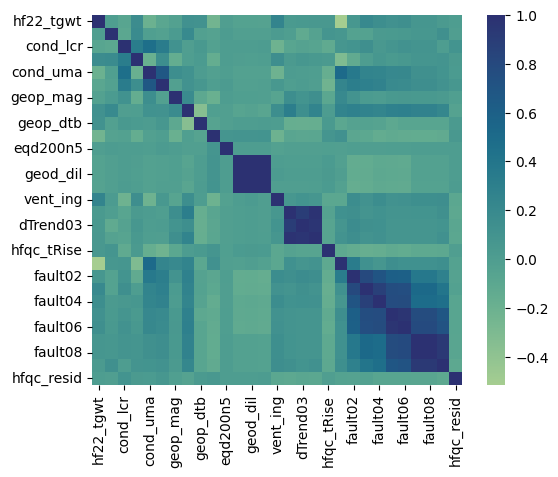

In [11]:
sns.heatmap(correlation, square=True, cmap="crest")

notes on seaborn, which features correlate to each other, and which correlate very highly to saleprice (which means we might wanna include them)

Next, another seaborn correlation heatmap, however in this one we are just looking at the left most column. This also helps us determine correlations and lets us know if we can remove two that are similar.

Index(['hfqc_resid', 'cond_lcr', 'cond_man', 'eqi200n5', 'cond_mcr',
       'geop_dtb', 'cond_uma', 'geod_2nd', 'hf22_tgwt', 'geod_shr',
       'geod_dil'],
      dtype='object')


<AxesSubplot:>

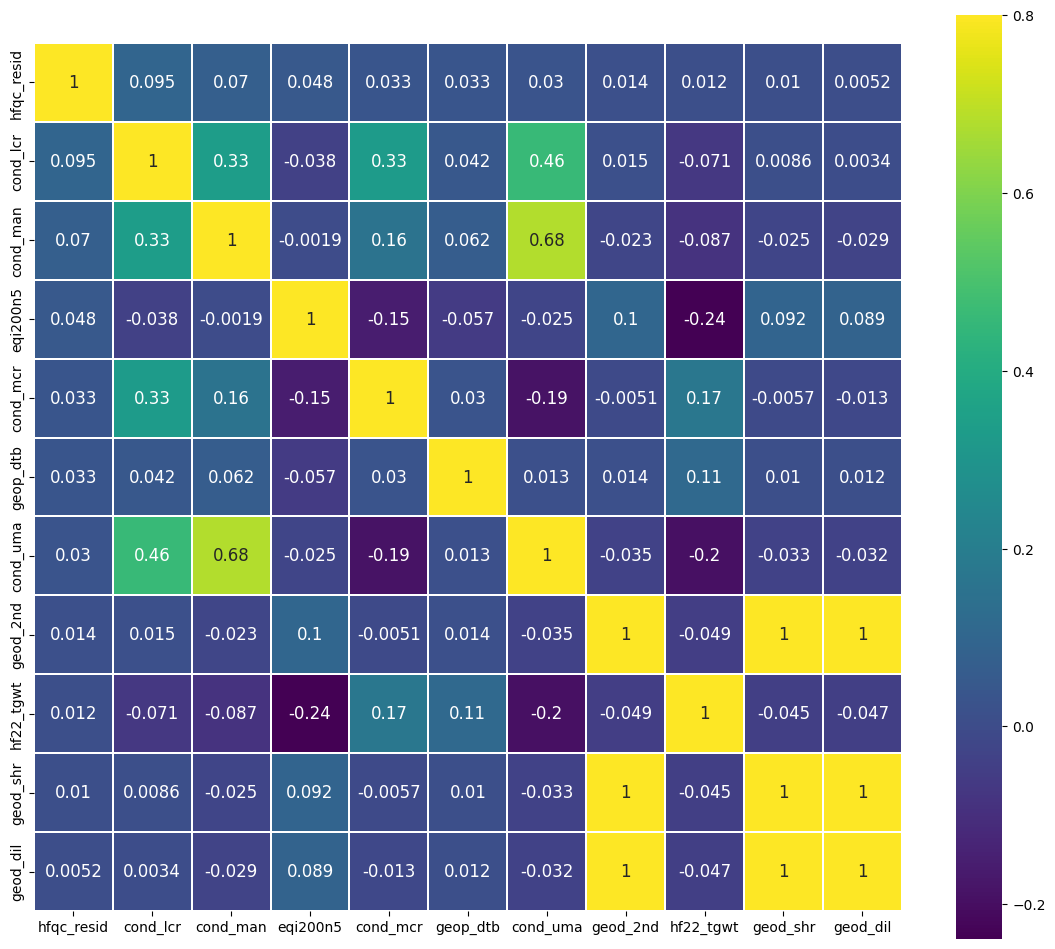

In [13]:
k= 11
cols = correlation.nlargest(k,'hfqc_resid')['hfqc_resid'].index
print(cols)
cm = np.corrcoef(dataset[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

And a pairplot, for good measure.

In [8]:
sns.pairplot(dataset)
plt.show()
plt.savefig('pairplot.png')

ImportError: cannot import name 'find_stack_level' from 'pandas.util._exceptions' (/home/andy/anaconda3/envs/d2l/lib/python3.9/site-packages/pandas/util/_exceptions.py)

Now, we will go to some coverage of outliers. The best way to notice outliars is by plotting graphs. We can then perform some methods listed in the article below to fix them:
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/